# Predict the CO2 emissions in the given dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data=pd.read_csv(r'FuelConsumptionCo2.csv')

In [34]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


//filtering out MAKE column starting with ACU in table using startswith()

In [9]:
data.MAKE[data.MAKE.str.startswith('ACU')]   

0     ACURA
1     ACURA
2     ACURA
3     ACURA
4     ACURA
5     ACURA
6     ACURA
7     ACURA
8     ACURA
9     ACURA
10    ACURA
11    ACURA
Name: MAKE, dtype: object

//filtering out the entire table with MAKE starting with ACU in table using startswith()

In [11]:
data[data.MAKE.str.startswith('ACU')]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [12]:
data.MAKE.str.startswith('ACU')

0        True
1        True
2        True
3        True
4        True
        ...  
1062    False
1063    False
1064    False
1065    False
1066    False
Name: MAKE, Length: 1067, dtype: bool

In [13]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

//Co2 emissions is the target variable which is dependant on the other features. ie.the rest of the columns

In [15]:
data[['ENGINESIZE','FUELTYPE']]

,ENGINESIZE,FUELTYPE
0,2.0,Z
1,2.4,Z
2,1.5,Z
3,3.5,Z
4,3.5,Z
...,...,...
1062,3.0,X
1063,3.2,X
1064,3.0,X
1065,3.2,X


In [16]:
data.CO2EMISSIONS

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

//If my target variable is CO2 emission,it is continuous hence choosing Regression algorithm 
and if my target variable is Transmission which is categorical, then choose classification algorithm.

In [19]:
import sklearn

##Linear Regression y is target variable and x is feature. it splits the data into train and test by default with test size 25%

In [22]:
y=data['CO2EMISSIONS']

In [23]:
y.shape

(1067,)

In [35]:
x=data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]

In [21]:
from sklearn.model_selection import train_test_split


In [38]:
test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size)

In [39]:
x_train.shape

(746, 3)

In [40]:
x_test.shape

(321, 3)

In [37]:
x.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], dtype='object')

In [ ]:
## Choose the right features
1.Remove less than 10% data columns
2.Remove irrelevant data as per business comments
3.Use wrapper methods to find out important features (removing 1 by 1 and creating a model)
100 features - model - evaluate - RMSE 10
99 features - model - evaluate - RMSE 10
.
20 features - model - evaluate - RMSE 4
.
1 features - model - evaluate - RMSE 100.  So here i will choose 20 features as it has less RMSE 

4.use statistical techniques to find the strong association between feature and target


In [47]:
small_data=data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]

array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

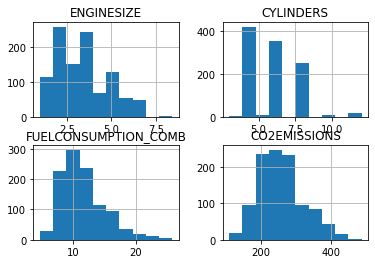

In [48]:
small_data.hist()

In [ ]:
##Here CO2 emissions has normal distribution as it is having u-shaped curve

Text(0, 0.5, 'CO2EMISSIONS')

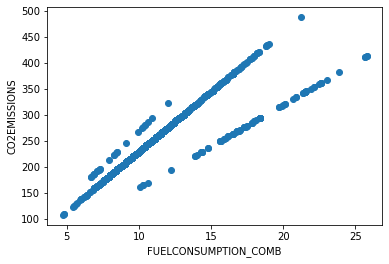

In [51]:
plt.scatter(small_data['FUELCONSUMPTION_COMB'],small_data['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

In [ ]:
## Algorithm object creation

In [55]:
from sklearn import linear_model as LM

In [56]:
lin_obj=LM.LinearRegression()

In [57]:
lin_obj

LinearRegression()

In [58]:
lin_obj.fit(x_train,y_train)  ##algorithm is trained into model

LinearRegression()

In [67]:
lin_obj.intercept_  ##intercept(c)


68.55672091104663

In [68]:
lin_obj.coef_   ##coefficient is slope(m)

array([11.20989321,  8.47665223,  8.69338825])

In [60]:
x_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
718,2.0,4,10.2
221,5.3,8,16.5
578,2.0,4,9.1
765,4.7,8,14.2
345,5.4,8,17.2
...,...,...,...
110,4.4,8,12.7
939,1.0,3,6.4
784,1.6,4,8.7
303,3.6,6,10.3


In [65]:
y_test_pred=lin_obj.predict(x_test) ##predicting the target

In [64]:
y_test[0:5]

718    235
221    380
578    209
765    327
345    396
Name: CO2EMISSIONS, dtype: int64

In [66]:
y_test_pred[0:5]

array([213.55567639, 339.22327887, 203.99294932, 312.50254997,
       346.42963997])

In [ ]:
##RMSE
mean of (y_test_pred-y_test)**2

In [69]:
np.mean((y_test_pred-y_test)**2)

664.7167332805949

In [71]:
RMSE=np.sqrt(np.mean((y_test_pred-y_test)**2))

In [72]:
RMSE

25.782101025335287

In [80]:
 25*100/664  ##if the percentage is more than 10% then it is not a good model

3.7650602409638556

In [ ]:
##MAE
absolute of |y_test_pred-y_test|

In [74]:
np.absolute((y_test_pred-y_test))

718    21.444324
221    40.776721
578     5.007051
765    14.497450
345    49.570360
         ...    
110     4.099500
939    13.834256
784     3.968363
303    12.314149
377    15.178085
Name: CO2EMISSIONS, Length: 321, dtype: float64

In [79]:
MAE=np.mean(np.absolute(y_test_pred-y_test))

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test,y_test_pred)  ##if r2_score is near to 1 or here it has 85% then it is a good model 

0.8557152299352996